In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Resources/Autism.csv")
# # Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# # Drop the null rows
df = df.dropna()
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(1117, 23)


,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [3]:
df.columns

Index(['Case No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age', 'Sex', 'Ethnicity', 'Jaundice ', 'Family_ASD', 'Residence',
       'Used_App_Before', 'Score', 'Screening Type', 'Language', 'User',
       'Class'],
      dtype='object')

In [4]:
df = df.drop(columns=['Case No', 'Sex', 'Ethnicity', 'Jaundice ', 'Family_ASD', 'Residence', 'Used_App_Before',
                      'Screening Type', 'Language', 'User', 'Score'])
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Class
0,0,0,0,0,0,0,0,0,0,0,27,NO
1,1,1,1,1,1,1,1,1,1,1,21,YES
2,1,1,0,1,1,0,0,1,0,0,18,NO
3,1,0,0,0,1,1,1,1,1,1,49,YES
4,1,1,1,0,0,0,0,1,0,0,18,NO


In [5]:
df = pd.get_dummies(df)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Class_NO,Class_YES
0,0,0,0,0,0,0,0,0,0,0,27,1,0
1,1,1,1,1,1,1,1,1,1,1,21,0,1
2,1,1,0,1,1,0,0,1,0,0,18,1,0
3,1,0,0,0,1,1,1,1,1,1,49,0,1
4,1,1,1,0,0,0,0,1,0,0,18,1,0


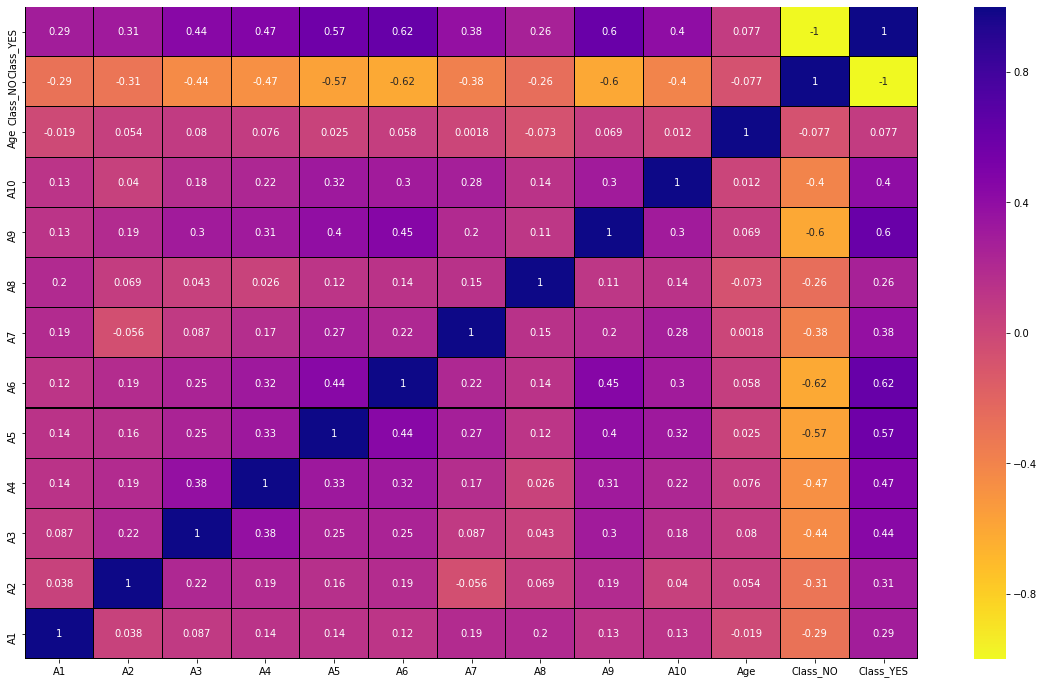

In [9]:
#get correlations of each features in dataset
#df = df.drop('Case No', axis=1)
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,12))



ax=sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="plasma_r", linewidths=.1,
              linecolor='black')
ax.set_ylim(0, 13)
import os
plt.savefig(os.path.join("Images", "HeatMapWithClass2.png"))

# grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
# f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
# ax = sns.heatmap(flights, ax=ax,
#                  cbar_ax=cbar_ax,
#                  cbar_kws={"orientation": "horizontal"})

# to make colorbar horizontal, add this code into sns.heatmap params:
# cbar_kws={"orientation": "horizontal"}

# plasma_r, spring_r, tab10, viridis_r